In [20]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATASET_ROOT = Path('D:\\dataset\\flybyml_dataset_v1')
data_root = DATASET_ROOT / "data"
image_root = DATASET_ROOT / "image"
meta_root = DATASET_ROOT / "meta"

# collect all possible session ids
session_ids = set()

for data_file in os.listdir(data_root):
    session_id = data_file.split(".")[0]
    session_ids.add(session_id)

for session_id in os.listdir(image_root):
    session_ids.add(session_id)

for meta_file in os.listdir(meta_root):
    session_id = meta_file.split(".")[0]
    session_ids.add(session_id)

session_ids = list(session_ids)

def load_data(session_id):
    with open(data_root / f"{session_id}.json", "r") as f:
        return json.load(f)

def load_meta(session_id):
    with open(meta_root / f"{session_id}.json", "r") as f:
        return json.load(f)

In [21]:
data = [load_data(session_id) for session_id in session_ids]
meta = [load_meta(session_id) for session_id in session_ids]

In [42]:
rel_pos = []
for d, m in zip(data, meta):
    try:
        rwy_heading = np.deg2rad(m['target_rwy']['attitude'][2])
        rotation_mat = np.array([[np.cos(-rwy_heading), -np.sin(-rwy_heading)],
                                 [np.sin(-rwy_heading), np.cos(-rwy_heading)]])
        abs_pos = []
        for datum in d:
            abs_pos.append(datum['state']['position'])
        abs_pos = np.array(abs_pos)
        pivot = np.array(m['target_rwy']['position'])
        rel = (abs_pos - pivot)[:, :2]
        rel_pos.append(np.matmul(rotation_mat, rel.T).T)
    except:
        pass
rel_pos[0].shape

(2066, 2)

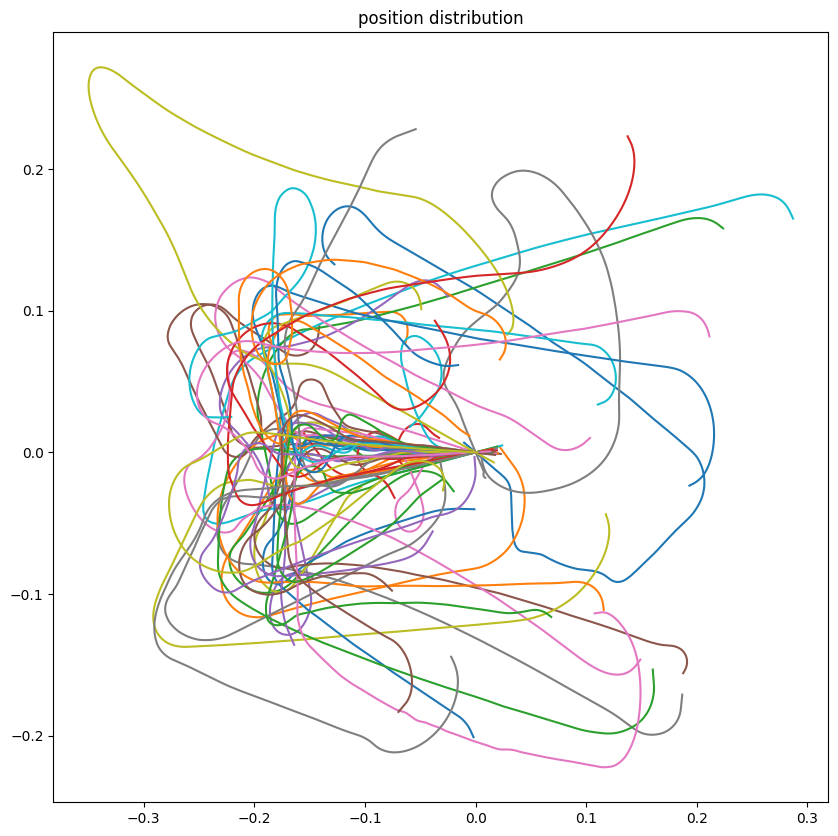

In [47]:
plt.figure(figsize=(10, 10))
plt.title('position distribution')
for rel in rel_pos:
    plt.plot(rel[:, 0], rel[:, 1])
plt.show()